# Data reading and preprocessing

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import time
import math
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import KBinsDiscretizer, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv("cardio_train.csv", delimiter = ';')
df

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1       0  
1          0     0       1       1  
2          0     0       0       1  
3          0     0       1       1  
4          0     0       0       0  
...      ...   ...     ...     ...  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0  

[70000 rows x 13 columns]

In [ ]:
df.describe()

id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250      0.572270      0.283484   
min     -150.000000    -70.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      120.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      2.000000      1.000000      0.000000   
max    16020.000000  11000.000000      3.000000      3.000000      1.000000   

               alco        active        cardio  
count  70000.000000  70000.000000  70000.000000  
mean       0.053771      0.803729      0.499700  
std        0.225568      0.397179      0.500003  
min        0.000000      0.000000      0.000000  
25%        0.000000      1.000000      0.000000  
50%        0.000000      1.000000      0.000000  
75%        0.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000

In [ ]:
df.shape

(70000, 13)

In [ ]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
df['age'] = round(df['age'] / 365.25)

* Convert age from days to years

In [ ]:
df.drop(['id'], axis = 1, inplace = True)

In [ ]:
df

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      50.0       2     168    62.0    110     80            1     1      0   
1      55.0       1     156    85.0    140     90            3     1      0   
2      52.0       1     165    64.0    130     70            3     1      0   
3      48.0       2     169    82.0    150    100            1     1      0   
4      48.0       1     156    56.0    100     60            1     1      0   
...     ...     ...     ...     ...    ...    ...          ...   ...    ...   
69995  53.0       2     168    76.0    120     80            1     1      1   
69996  62.0       1     158   126.0    140     90            2     2      0   
69997  52.0       2     183   105.0    180     90            3     1      0   
69998  61.0       1     163    72.0    135     80            1     2      0   
69999  56.0       1     170    72.0    120     80            2     1      0   

       alco  active  cardio  
0         0       1       0  
1         0       1       1  
2         0       0       1  
3         0       1       1  
4         0       0       0  
...     ...     ...     ...  
69995     0       1       0  
69996     0       1       1  
69997     1       0       1  
69998     0       0       1  
69999     0       1       0  

[70000 rows x 12 columns]

In [ ]:
df.duplicated().sum()

np.int64(3821)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
df = df.query("height >=120 & height <= 215 & weight >= 30")

In [ ]:
df.shape

(66119, 12)

In [ ]:
df['bmi'] = df['weight'] / ((df['height']/100)**2)
df.drop(['height', 'weight'], axis = 1,inplace = True)

<ipython-input-49-47feaba8589d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bmi'] = df['weight'] / ((df['height']/100)**2)
<ipython-input-49-47feaba8589d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['height', 'weight'], axis = 1,inplace = True)


* This feature represents the 'height' ,'weight' features and can therefore be deleted.



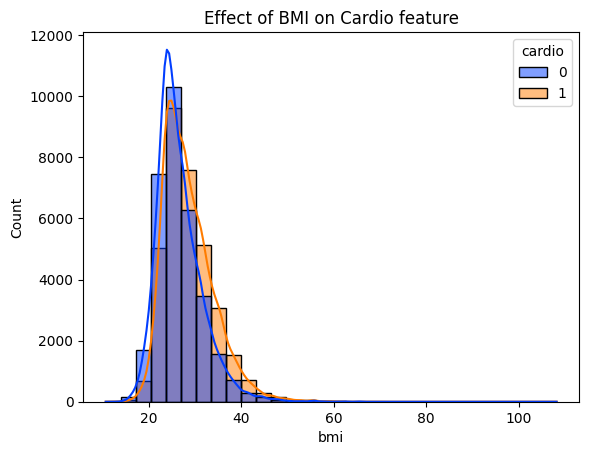

In [ ]:
sns.histplot(data = df, x='bmi', hue='cardio', kde=True, bins=30, palette = 'bright')
plt.title("Effect of BMI on Cardio feature")
plt.show()

* we can see that there is a higher incidence of heart disease among 'bmi' higher. Delete unreasonable values

In [ ]:
df = df.query("bmi <= 50")

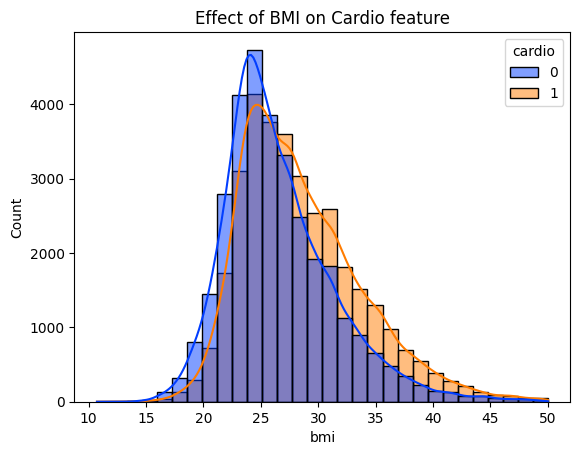

In [ ]:
sns.histplot(data = df, x='bmi', hue='cardio', kde=True, bins=30, palette = 'bright')
plt.title("Effect of BMI on Cardio feature")
plt.show()

In [ ]:
df.shape

(65926, 11)

* Drop unrealistic data

In [ ]:
df = df.query('70<ap_hi<240 & 40<ap_lo<180 & ap_hi>ap_lo')

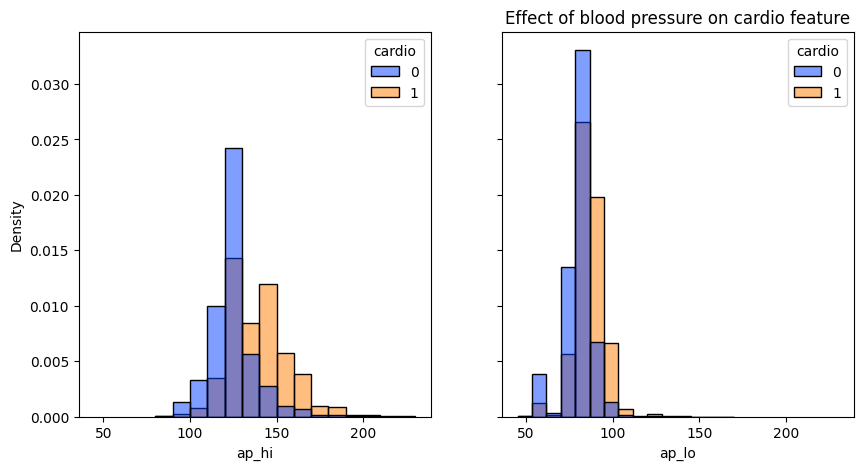

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(10,5), sharex=True, sharey=True)
sns.histplot(df, x = 'ap_hi', hue = 'cardio',bins = 15, palette = 'bright', stat= 'density', ax = axes[0])
sns.histplot(df, x = 'ap_lo', hue = 'cardio',bins = 15, palette = 'bright', stat= 'density', ax = axes[1])
plt.title("Effect of blood pressure on cardio feature")
plt.show()

<Axes: >

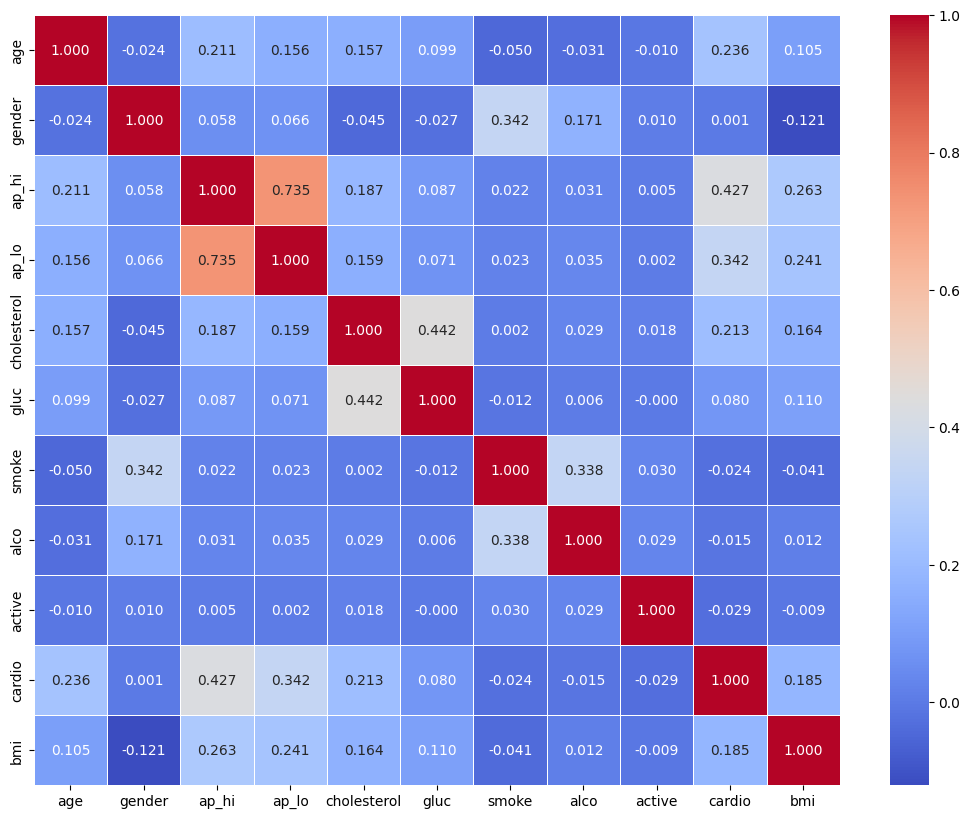

In [ ]:
corr = df.corr()
f,ax = plt.subplots(figsize= (13,10))
sns.heatmap(corr, annot=True, fmt='.3f', linewidth=0.5, ax=ax,cmap='coolwarm')

- It can be seen that the factors that mainly affect the 'cardio' feature are blood pressure, cholesterol, age, and BMI.



In [ ]:
df= df.drop(['active', 'smoke', 'alco', 'gluc'], axis=1)

In [ ]:
df

age  gender  ap_hi  ap_lo  cholesterol  cardio        bmi
0      50.0       2    110     80            1       0  21.967120
1      55.0       1    140     90            3       1  34.927679
2      52.0       1    130     70            3       1  23.507805
3      48.0       2    150    100            1       1  28.710479
4      48.0       1    100     60            1       0  23.011177
...     ...     ...    ...    ...          ...     ...        ...
69994  58.0       1    150     80            1       1  29.384757
69995  53.0       2    120     80            1       0  26.927438
69997  52.0       2    180     90            3       1  31.353579
69998  61.0       1    135     80            1       1  27.099251
69999  56.0       1    120     80            2       0  24.913495

[64583 rows x 7 columns]

# Model

In [ ]:
df

age  gender  ap_hi  ap_lo  cholesterol  cardio        bmi
0      50.0       2    110     80            1       0  21.967120
1      55.0       1    140     90            3       1  34.927679
2      52.0       1    130     70            3       1  23.507805
3      48.0       2    150    100            1       1  28.710479
4      48.0       1    100     60            1       0  23.011177
...     ...     ...    ...    ...          ...     ...        ...
69994  58.0       1    150     80            1       1  29.384757
69995  53.0       2    120     80            1       0  26.927438
69997  52.0       2    180     90            3       1  31.353579
69998  61.0       1    135     80            1       1  27.099251
69999  56.0       1    120     80            2       0  24.913495

[64583 rows x 7 columns]

In [ ]:
des_df = df.copy()
des_df

age  gender  ap_hi  ap_lo  cholesterol  cardio        bmi
0      50.0       2    110     80            1       0  21.967120
1      55.0       1    140     90            3       1  34.927679
2      52.0       1    130     70            3       1  23.507805
3      48.0       2    150    100            1       1  28.710479
4      48.0       1    100     60            1       0  23.011177
...     ...     ...    ...    ...          ...     ...        ...
69994  58.0       1    150     80            1       1  29.384757
69995  53.0       2    120     80            1       0  26.927438
69997  52.0       2    180     90            3       1  31.353579
69998  61.0       1    135     80            1       1  27.099251
69999  56.0       1    120     80            2       0  24.913495

[64583 rows x 7 columns]

In [ ]:
continuous_cols = ['age', 'ap_hi', 'ap_lo', 'bmi']

discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
des_df[continuous_cols] = discretizer.fit_transform(des_df[continuous_cols])



des_df

age  gender  ap_hi  ap_lo  cholesterol  cardio  bmi
0      2.0       2    1.0    1.0            1       0  1.0
1      3.0       1    2.0    1.0            3       1  3.0
2      3.0       1    1.0    1.0            3       1  1.0
3      2.0       2    2.0    2.0            1       1  2.0
4      2.0       1    0.0    0.0            1       0  1.0
...    ...     ...    ...    ...          ...     ...  ...
69994  4.0       1    2.0    1.0            1       1  2.0
69995  3.0       2    1.0    1.0            1       0  2.0
69997  3.0       2    3.0    1.0            3       1  2.0
69998  4.0       1    1.0    1.0            1       1  2.0
69999  3.0       1    1.0    1.0            2       0  1.0

[64583 rows x 7 columns]

## Part 1: From scratch Decision Tree

In [ ]:
# Split data
X_des = des_df.drop("cardio", axis=1).values.tolist()
y_des = des_df["cardio"].tolist()
X_des_train, X_des_test, y_des_train, y_des_test = train_test_split(X_des, y_des, test_size=0.2, random_state=42)

In [ ]:
class ID3Classifier:
    """
    A Decision Tree classifier based on the ID3 (Iterative Dichotomiser 3) algorithm.
    This model uses entropy and information gain to build the decision tree.
    """

    def __init__(self):
        """
        Initializes the ID3Classifier instance. The tree and feature_indices are set to None initially.
        """
        self.tree = None  # The decision tree structure
        self.feature_indices = None  # List of indices representing features

    def _entropy(self, labels):
        """
        Calculates the entropy of a set of labels.

        Args:
        labels (list): The list of labels for a particular subset of data.

        Returns:
        float: The entropy of the labels.
        """
        total = len(labels)  # Total number of samples
        counts = Counter(labels)  # Count of each unique label
        return -sum((count/total) * np.log2(count/total) for count in counts.values())

    def _info_gain(self, data, labels, feature_idx):
        """
        Calculates the information gain for a specific feature.

        Args:
        data (list): The dataset (list of lists) where each row is a sample.
        labels (list): The list of labels for the dataset.
        feature_idx (int): The index of the feature for which we are calculating the information gain.

        Returns:
        float: The information gain for the feature at index `feature_idx`.
        """
        total_entropy = self._entropy(labels)  # Calculate entropy of the entire set of labels
        values = set(row[feature_idx] for row in data)  # Unique values for the feature
        weighted_entropy = 0  # Initialize weighted entropy

        # Loop through all possible feature values
        for val in values:
            # Subset of data and labels where the feature value matches
            subset = [row for row in data if row[feature_idx] == val]
            subset_labels = [labels[i] for i in range(len(data)) if data[i][feature_idx] == val]
            weighted_entropy += (len(subset) / len(data)) * self._entropy(subset_labels)  # Weighted entropy for this subset

        # Return the information gain (entropy before split - weighted entropy after split)
        return total_entropy - weighted_entropy

    def _majority_class(self, labels):
        """
        Returns the majority class from a set of labels.

        Args:
        labels (list): The list of labels for a particular subset of data.

        Returns:
        object: The majority class label.
        """
        return Counter(labels).most_common(1)[0][0]  # Returns the most common label

    def _id3(self, data, labels, features):
        """
        Recursively builds the decision tree using the ID3 algorithm.

        Args:
        data (list): The dataset (list of lists) where each row is a sample.
        labels (list): The list of labels for the dataset.
        features (list): The list of available feature indices.

        Returns:
        dict: A nested dictionary representing the decision tree.
        """
        # Base case: if all labels are the same, return the label
        if len(set(labels)) == 1:
            return labels[0]

        # Base case: if there are no features left, return the majority class
        if not features:
            return self._majority_class(labels)

        # Calculate information gain for each feature
        gains = [self._info_gain(data, labels, i) for i in features]
        best_feature = features[np.argmax(gains)]  # Feature with highest information gain

        tree = {best_feature: {}}  # Initialize the tree with the best feature
        values = set(row[best_feature] for row in data)  # Unique values for the best feature

        # Recursively build the tree for each subset of data based on the feature value
        for val in values:
            subset_data = [row for row in data if row[best_feature] == val]
            subset_labels = [labels[i] for i in range(len(data)) if data[i][best_feature] == val]
            remaining_features = [f for f in features if f != best_feature]  # Remove the best feature from the list

            # Recursive call to build the subtree
            subtree = self._id3(subset_data, subset_labels, remaining_features)
            tree[best_feature][val] = subtree  # Add the subtree to the tree

        return tree

    def fit(self, X, y):
        """
        Fits the ID3 model to the training data by building the decision tree.

        Args:
        X (list): The feature data (list of lists).
        y (list): The target labels (list).
        """
        self.feature_indices = list(range(len(X[0])))  # Set feature indices based on the number of features in X
        self.tree = self._id3(X, y, self.feature_indices)  # Build the decision tree using the ID3 algorithm

    def _predict_one(self, tree, sample):
        """
        Predicts the label for a single sample based on the trained decision tree.

        Args:
        tree (dict): The decision tree structure.
        sample (list): The feature values for a single sample.

        Returns:
        object: The predicted label for the sample.
        """
        # If tree is a leaf node, return the label
        if not isinstance(tree, dict):
            return tree

        # Navigate down the tree based on the feature values in the sample
        feature_idx = next(iter(tree))  # Get the first feature in the tree
        feature_val = sample[feature_idx]  # Get the corresponding feature value for the sample
        if feature_val in tree[feature_idx]:
            return self._predict_one(tree[feature_idx][feature_val], sample)  # Recur to the next level
        else:
            return 0  # Return 0 if the feature value does not exist in the tree (default behavior)

    def predict(self, X):
        """
        Predicts the labels for a list of samples using the trained decision tree.

        Args:
        X (list): The feature data (list of lists).

        Returns:
        list: The list of predicted labels for each sample in X.
        """
        return [self._predict_one(self.tree, sample) for sample in X]  # Predict for each sample in X



In [ ]:

model = ID3Classifier()

start_train_time = time.time()
model.fit(X_des_train, y_des_train)
fit_time = time.time() - start_train_time

start_pred_time = time.time()
y_train_pred = model.predict(X_des_train)
y_test_pred = model.predict(X_des_test)
pred_time = time.time() - start_pred_time



In [ ]:
# Drop the single NaN from training data
mask_train = ~np.isnan(y_des_train)

y_des_train_clean = np.array(y_des_train)[mask_train]
y_train_pred_clean = np.array(y_train_pred)[mask_train]

# No NaNs in test data, so no need to clean
print("Train Accuracy for From scratch Decision Tree model:", accuracy_score(y_des_train_clean, y_train_pred_clean))
print("Test Accuracy  for From scratch Decision Tree model:", accuracy_score(y_des_test, y_test_pred))

print(f"Train time for From scratch Decision Tree model : {fit_time:.4f} sec")
print(f"Prediction time for From scratch Decision Tree model : {pred_time:.4f} sec")

Train Accuracy for From scratch Decision Tree model: 0.7151705183292688
Test Accuracy  for From scratch Decision Tree model: 0.7226136099713556
Train time for From scratch Decision Tree model : 1.7800 sec
Prediction time for From scratch Decision Tree model : 0.1477 sec


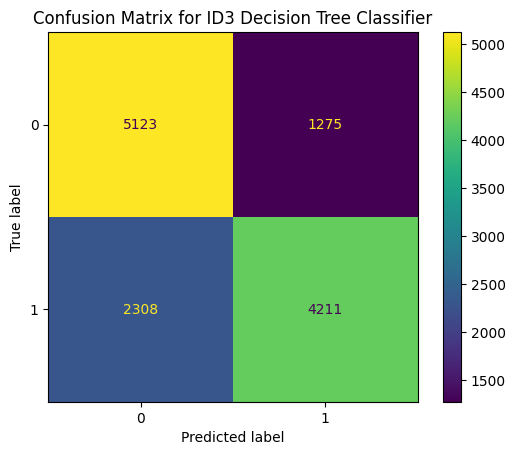

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_des_test, y_test_pred)

# Create confusion matrix display
disp = ConfusionMatrixDisplay(cm)

# Plot confusion matrix
disp.plot()

# Add a title
plt.title('Confusion Matrix for ID3 Decision Tree Classifier')

# Show the plot
plt.show()


## Part 2: Built-in Decision Tree

In [ ]:
X = df.drop(['cardio'], axis = 1)
y = df['cardio']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Grid Search

In [ ]:
param_grid= {
    'max_depth': [2, 3, 5, 7, 10],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4]
}

In [ ]:
tree_clf = DecisionTreeClassifier(random_state = 42, criterion = 'entropy')
grid_search = GridSearchCV(estimator = tree_clf, param_grid = param_grid,
                          cv = 5, scoring = 'accuracy', n_jobs=1, verbose = 1)

grid_search.fit(X_train, y_train)

print("Best Params: ", grid_search.best_params_)
print("Best CV score: ", grid_search.best_score_)



Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best Params:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV score:  0.7241899441832572


In [ ]:
best_tree = DecisionTreeClassifier(random_state = 42, criterion = 'entropy', max_depth = 5, min_samples_leaf=1, min_samples_split=2)

start_train_time = time.time()
best_tree.fit(X_train, y_train)
train_time = time.time() - start_train_time


start_predict_time = time.time()
y_pred_train = best_tree.predict(X_train)
y_pred_test = best_tree.predict(X_test)
predict_time = time.time() - start_predict_time



train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print(f"Train accuracy for built in Decision Tree model: {train_acc}")
print(f"Test accuracy for built in Decision Tree model: {test_acc}")

print(f"Train time for built in Decision Tree model : {train_time: .4f} sec")
print(f"Predection time for built in Decision Tree model : {predict_time: .4f} sec")

Train accuracy for built in Decision Tree model: 0.7264351798087717
Test accuracy for built in Decision Tree model: 0.7302779283115275
Train time for built in Decision Tree model :  0.0490 sec
Predection time for built in Decision Tree model :  0.0065 sec


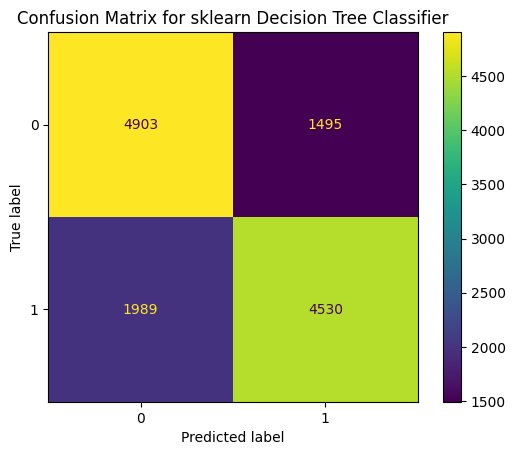

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Create confusion matrix display
disp = ConfusionMatrixDisplay(cm)

# Plot confusion matrix
disp.plot()

# Add a title
plt.title('Confusion Matrix for sklearn Decision Tree Classifier')

# Show the plot
plt.show()


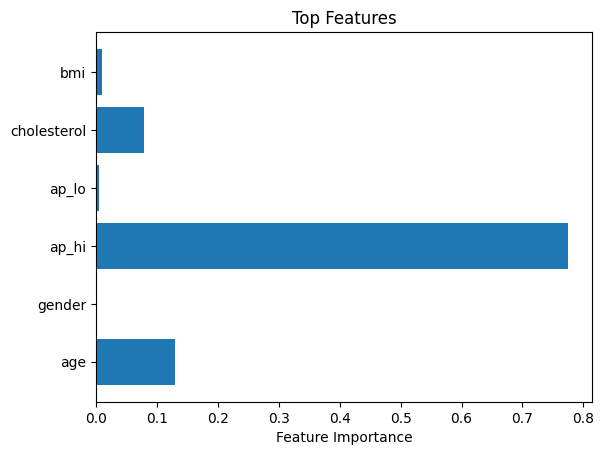

In [ ]:
importances = best_tree.feature_importances_
features = X_train.columns  # or use .columns if it's a DataFrame
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Top Features")
plt.show()

# Comparison between 2 models



### 🔍 **Accuracy Comparison**

| Metric                          | From-Scratch ID3 | Sklearn Decision Tree |
|-------------------------------|------------------|------------------------|
| **Train Accuracy**            |  **71.51%**     | **72.64%**                 |
| **Test Accuracy**             |  **72.26%**     |  **73.03%**          |
| **Train Time**                | 2.26 sec        | 0.05 sec            |
| **Prediction Time**           | 0.1365 sec        | 0.0066 sec            |

---

<!--
###  Interpretation:

####  **From-Scratch Model**
- **Overfitting!** model memorized the training data (very high train accuracy) but **generalizes poorly** (low test accuracy).


####  **Built-in Scikit-Learn Model**
- More **balanced** generalization (train vs test accuracy are close)
- Fast and optimized
- Has built-in **regularization** options:
  - `max_depth`
  - `min_samples_split`
  - `min_samples_leaf` -->



# **Point 3**


In [ ]:
data = pd.read_csv("/content/student_behavior.csv")
data

Early Registration  Finished Homework II  Senior  Likes Coffee  \
0                    1                     1       0             0   
1                    1                     1       1             0   
2                    0                     0       1             0   
3                    0                     1       1             0   
4                    0                     1       1             0   
5                    0                     0       1             1   
6                    1                     0       0             0   
7                    0                     1       0             1   
8                    0                     0       1             0   
9                    1                     0       0             0   
10                   1                     1       1             0   
11                   0                     1       1             1   
12                   0                     0       0             0   
13                   1                     0       0             1   

    Liked The Last Homework  A  
0                         1  1  
1                         1  1  
2                         0  0  
3                         1  0  
4                         0  1  
5                         1  1  
6                         1  0  
7                         1  1  
8                         1  1  
9                         0  0  
10                        0  1  
11                        1  0  
12                        1  0  
13                        0  1

In [ ]:
X = data.drop(['A'], axis = 1)
y = data['A']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [ ]:
tree_p3 = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')

start_train_time = time.time()
tree_p3.fit(X_train, y_train)
train_time = time.time() - start_train_time


start_predict_time = time.time()
y_pred_train = tree_p3.predict(X_train)
y_pred_test = tree_p3.predict(X_test)
predict_time = time.time() - start_predict_time



train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print(f"Train accuracy for built in Decision Tree model: {train_acc}")
print(f"Test accuracy for built in Decision Tree model: {test_acc}")

print(f"Train time for built in Decision Tree model : {train_time: .4f} sec")
print(f"Predection time for built in Decision Tree model : {predict_time: .4f} sec")

Train accuracy for built in Decision Tree model: 0.8181818181818182
Test accuracy for built in Decision Tree model: 0.3333333333333333
Train time for built in Decision Tree model :  0.0053 sec
Predection time for built in Decision Tree model :  0.0031 sec


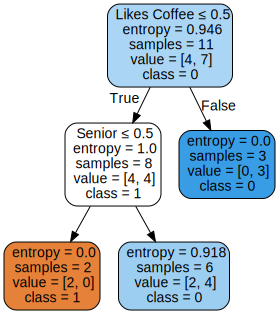

In [ ]:


from graphviz import Source
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    tree_p3,
    out_file = None,
    feature_names = X.columns,
    class_names = [str(cls) for cls in y.unique()],
    filled = True,
    rounded = True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("Point 3 tree", format="png", cleanup=False)
graph


In [ ]:
tree = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
tree.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

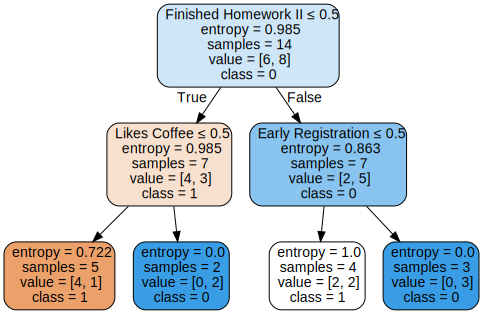

In [ ]:


from graphviz import Source
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    tree,
    out_file = None,
    feature_names = X.columns,
    class_names = [str(cls) for cls in y.unique()],
    filled = True,
    rounded = True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("Point 3 tree", format="png", cleanup=False)
graph


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train_id3 = X_train.astype(str).values.tolist()
X_test_id3 = X_test.astype(str).values.tolist()
y_train_id3 = y_train.tolist()
y_test_id3 = y_test.tolist()

tree_p1 = ID3Classifier()
tree_p1.fit(X_train_id3, y_train_id3)

In [ ]:

tree_p1 = ID3Classifier()

start_train_time = time.time()
tree_p1.fit(X_train_id3, y_train_id3)
fit_time = time.time() - start_train_time

start_pred_time = time.time()
y_train_pred = tree_p1.predict(X_train_id3)
y_test_pred = tree_p1.predict(X_test_id3)
pred_time = time.time() - start_pred_time



In [ ]:


print("Train Accuracy for From scratch Decision Tree model:", accuracy_score(y_train_id3, y_train_pred))
print("Test Accuracy  for From scratch Decision Tree model:", accuracy_score(y_test_id3, y_test_pred))

print(f"Train time for From scratch Decision Tree model : {fit_time:.4f} sec")
print(f"Prediction time for From scratch Decision Tree model : {pred_time:.4f} sec")

Train Accuracy for From scratch Decision Tree model: 1.0
Test Accuracy  for From scratch Decision Tree model: 0.3333333333333333
Train time for From scratch Decision Tree model : 0.0007 sec
Prediction time for From scratch Decision Tree model : 0.0001 sec


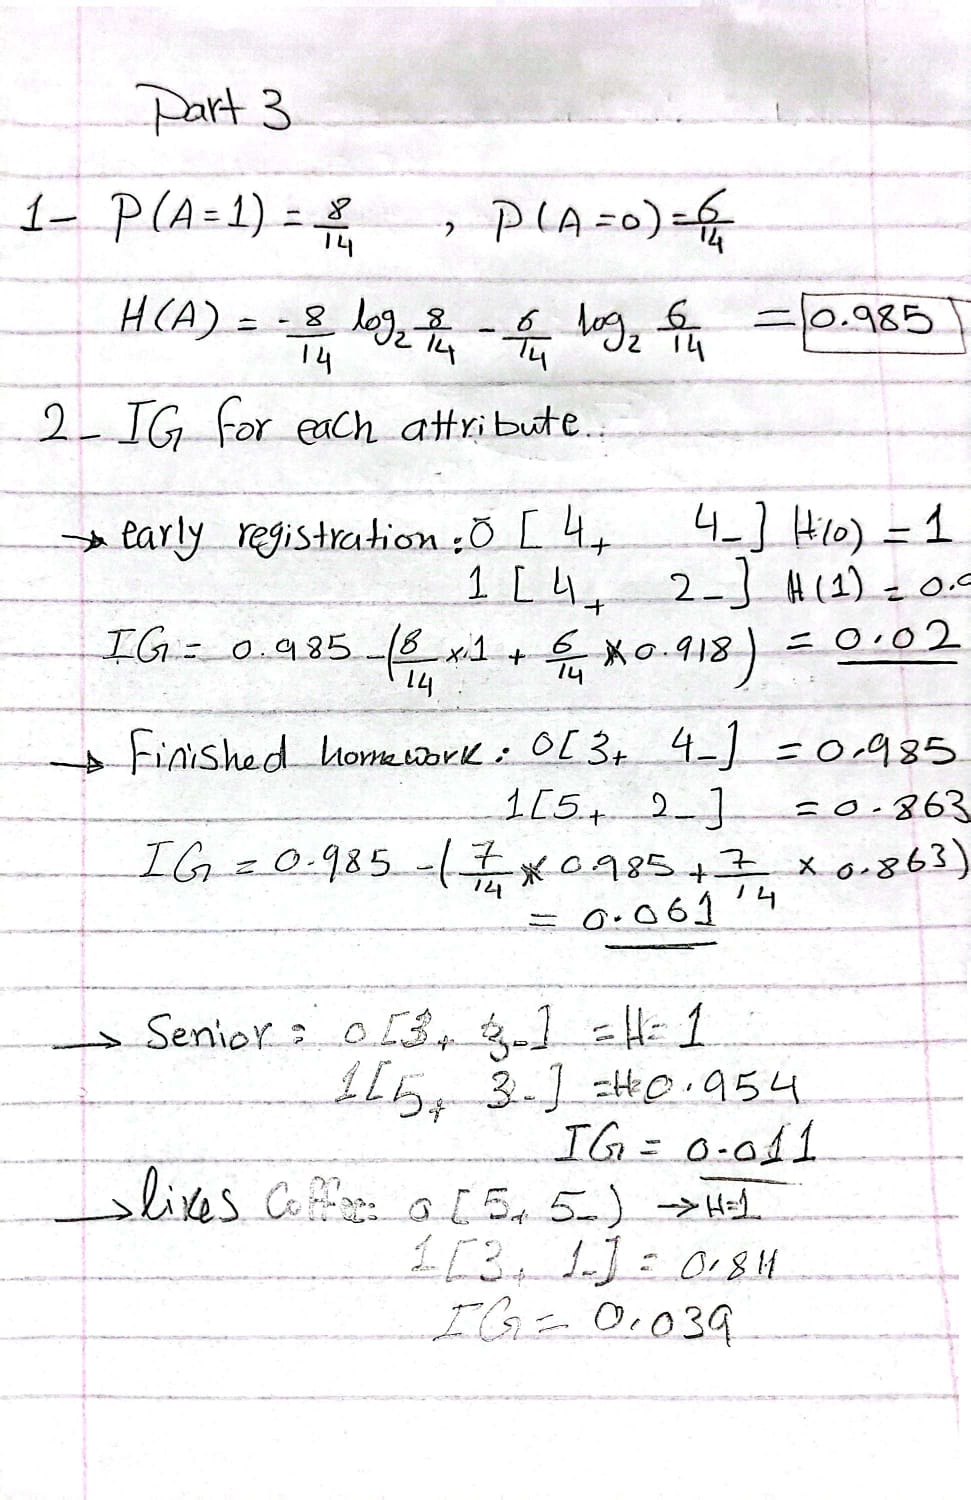

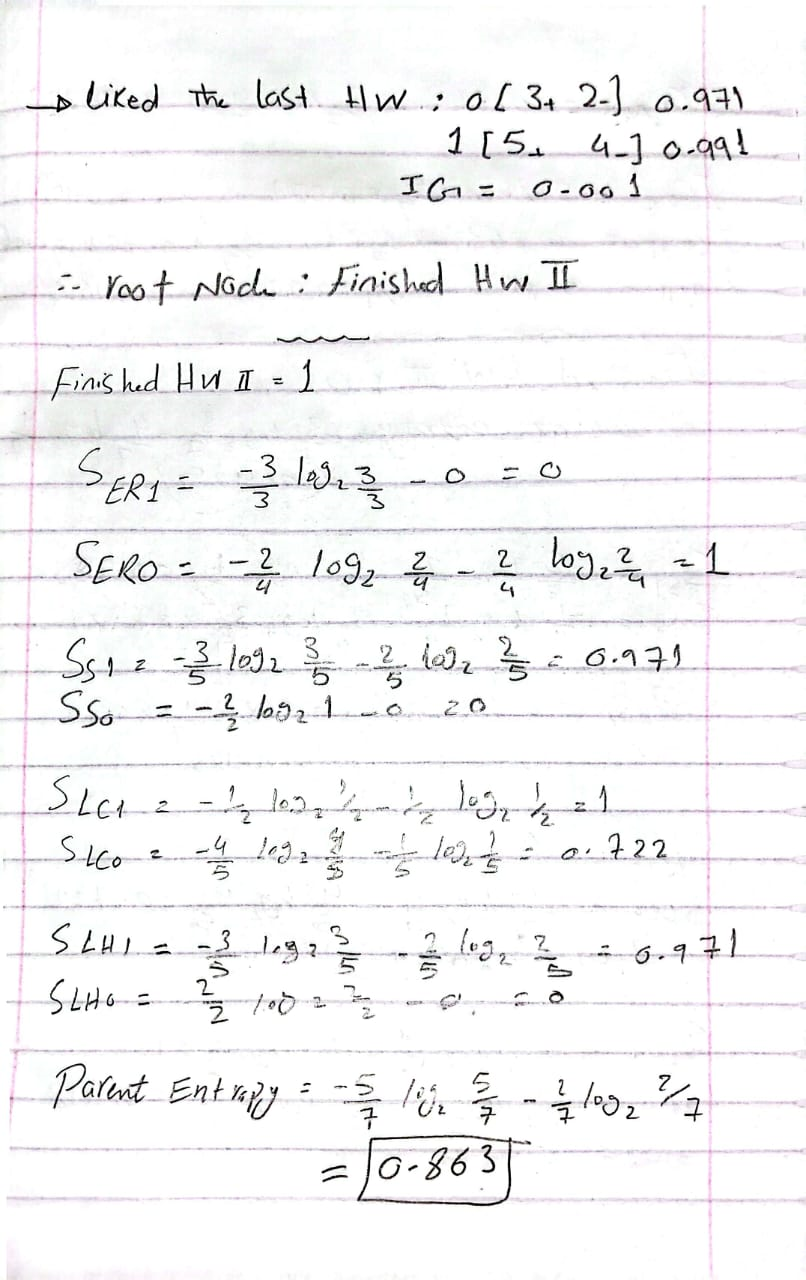

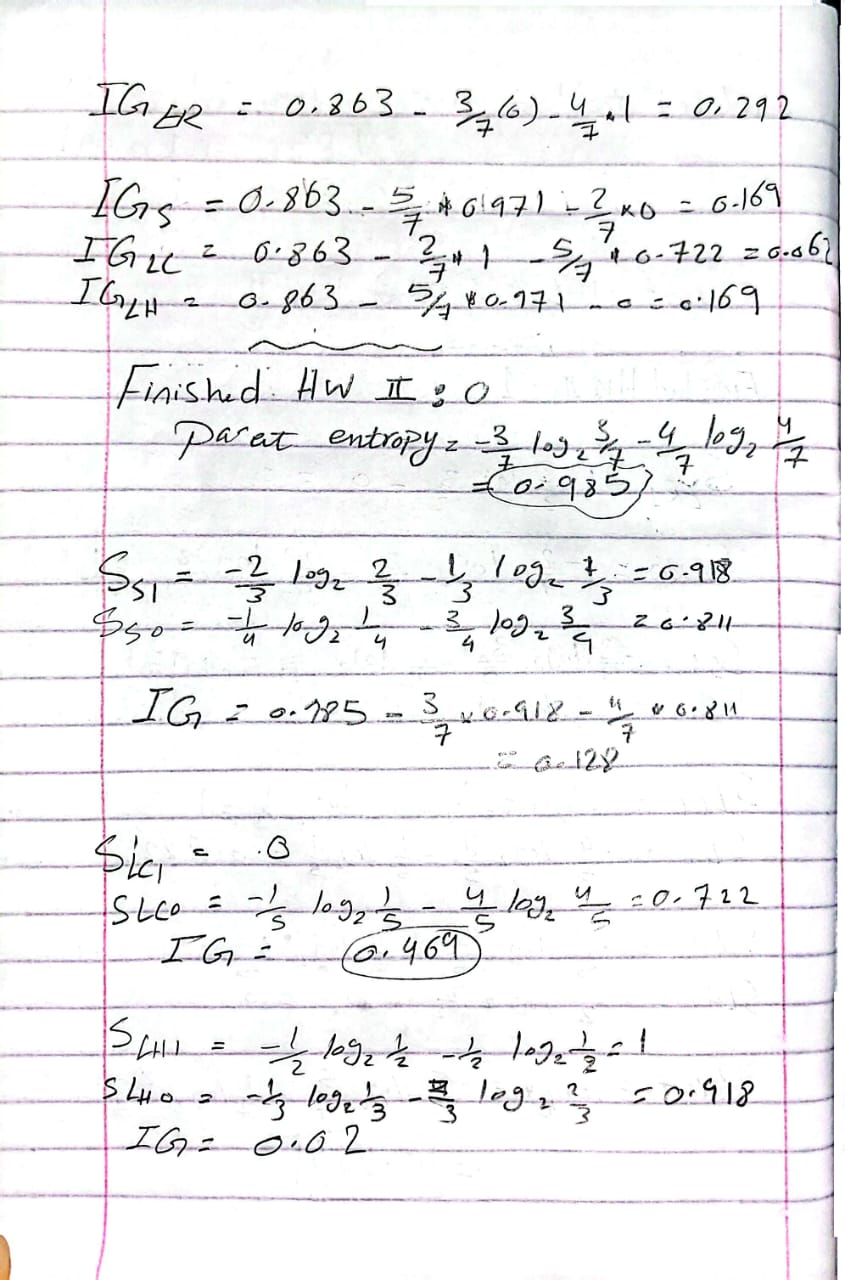

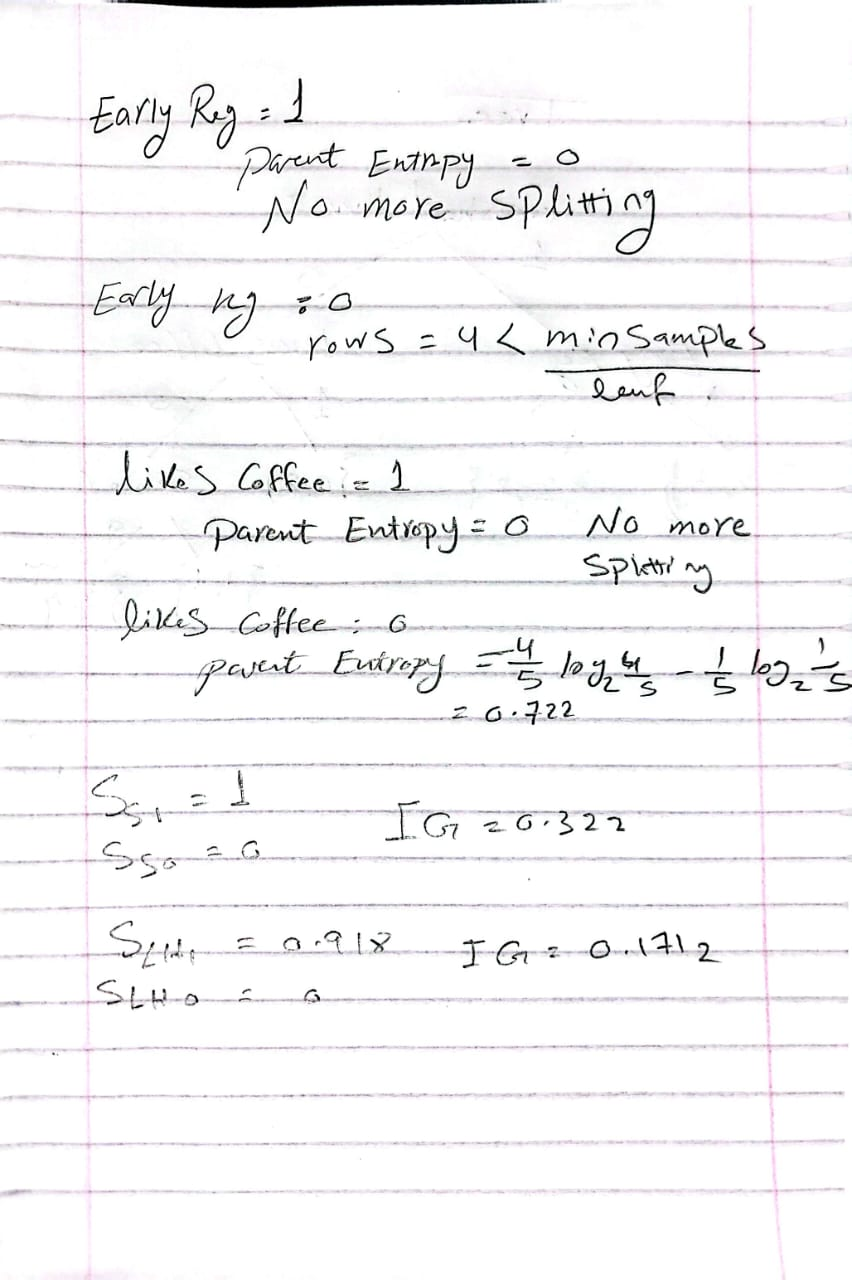

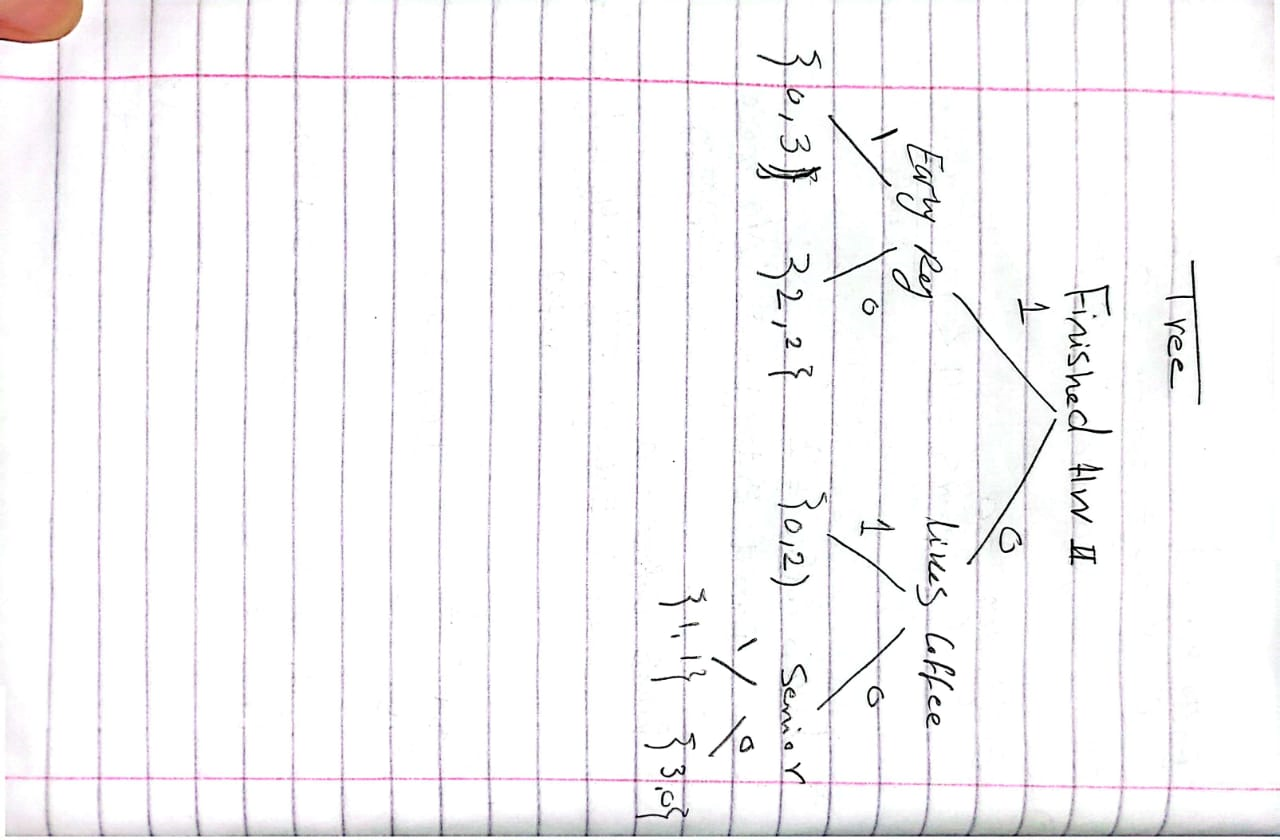